In [54]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics

In [4]:
df = pd.read_csv("~/Desktop/grad_school_shit/Spring2019/MachineLearning/GroupProject/creditcard.csv")

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
x = df.drop('Class', axis=1)
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [7]:
y = df['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [8]:
res = dict(zip(list(x),
               mutual_info_classif(x, y)
               ))
print(res)

{'Time': 0.0019102560260595425, 'V1': 0.0021266613459182127, 'V2': 0.0032280496386675184, 'V3': 0.004951923879878084, 'V4': 0.004975928557737541, 'V5': 0.002391282510442294, 'V6': 0.0023877964471322732, 'V7': 0.00395182336714206, 'V8': 0.0018984186387377422, 'V9': 0.004276691243075059, 'V10': 0.007530360334659925, 'V11': 0.0068311986391824675, 'V12': 0.007601234689918468, 'V13': 0.00040847476538807825, 'V14': 0.008136137025233858, 'V15': 0.00031483347476612966, 'V16': 0.0061444032608913846, 'V17': 0.008258065520265645, 'V18': 0.004316925188112664, 'V19': 0.0014742068703141875, 'V20': 0.001206659172800606, 'V21': 0.0024521784909981026, 'V22': 0.0003531815503081681, 'V23': 0.0007615205277002879, 'V24': 0.0006419884233281881, 'V25': 0.0004984367248579424, 'V26': 0.0004997507092318054, 'V27': 0.002444072498271943, 'V28': 0.0018713214852906779, 'Amount': 0.0015182851822865828}


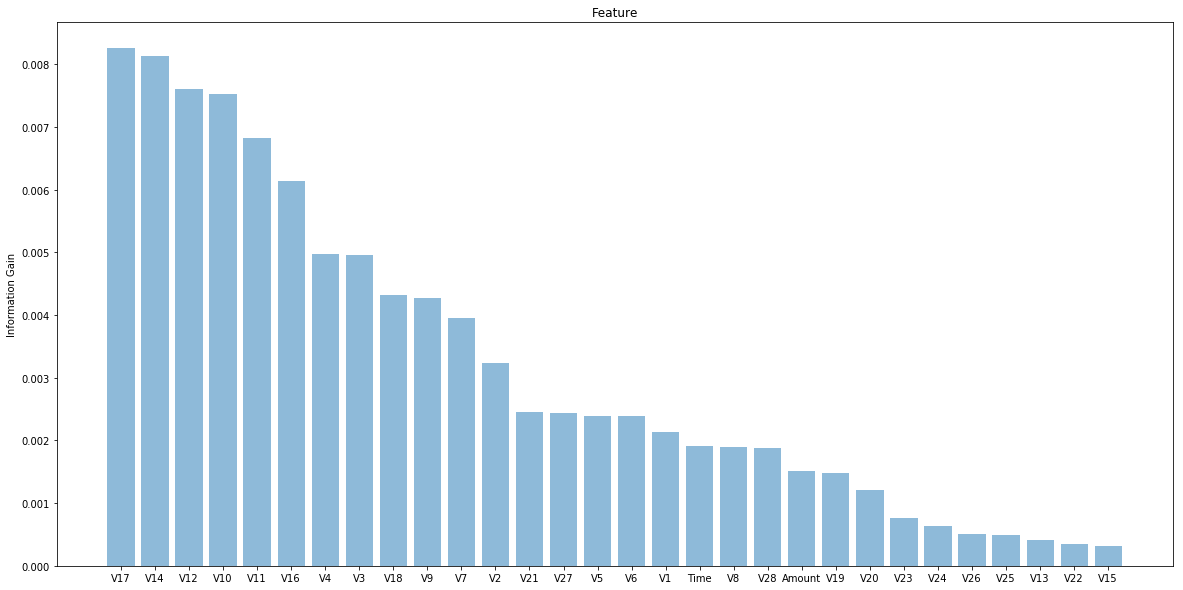

In [9]:
ordered_df = pd.DataFrame(list(res.items()), columns=['Feature', 'Information_Gain'])
ordered_df.sort_values(by=['Information_Gain'], ascending=False, inplace=True)


ordered_y = ordered_df['Information_Gain']
ordered_x = ordered_df['Feature']

plt.figure(figsize=(20,10))
plt.bar(ordered_x, ordered_y, align='center', alpha=0.5)
plt.ylabel('Information Gain')
plt.title('Feature')


plt.show()

<Figure size 1440x720 with 0 Axes>

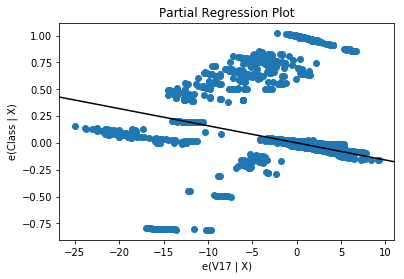

In [10]:
# endog = class = y
# exog = independent = x
# x['V17'], x['V14'], x['V12'], x['V10'], x['V11']
others = x.drop('V17', axis=1)
plt.figure(figsize=(20,10))
fig = sm.graphics.plot_partregress(y, x['V17'], others, obs_labels=False)

<Figure size 1440x720 with 0 Axes>

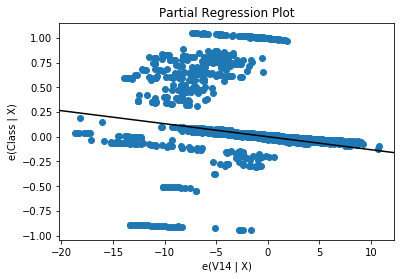

In [11]:
others = x.drop('V14', axis=1)
plt.figure(figsize=(20,10))
fig = sm.graphics.plot_partregress(y, x['V14'], others, obs_labels=False)

<Figure size 1440x720 with 0 Axes>

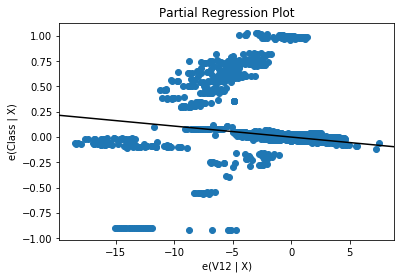

In [12]:
others = x.drop('V12', axis=1)
plt.figure(figsize=(20,10))
fig = sm.graphics.plot_partregress(y, x['V12'], others, obs_labels=False)

<Figure size 1440x720 with 0 Axes>

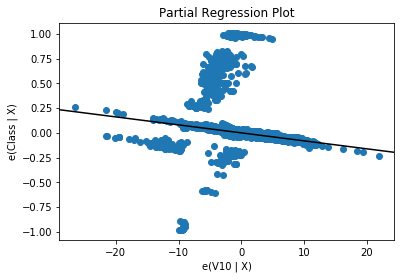

In [13]:
others = x.drop('V10', axis=1)
plt.figure(figsize=(20,10))
fig = sm.graphics.plot_partregress(y, x['V10'], others, obs_labels=False)

<Figure size 1440x720 with 0 Axes>

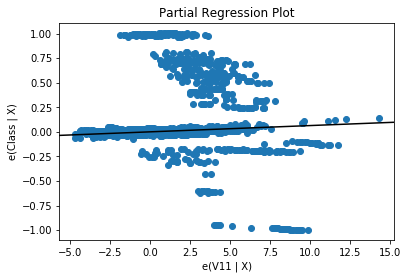

In [14]:
others = x.drop('V11', axis=1)
plt.figure(figsize=(20,10))
fig = sm.graphics.plot_partregress(y, x['V11'], others, obs_labels=False)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [17]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [18]:
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
174323,121864.0,2.038254,-1.109910,-0.556649,-0.972656,-0.957880,-0.256811,-0.944912,-0.011825,-0.235725,...,0.258792,-0.501437,-0.466986,-0.483050,0.001241,-0.043777,68.00,0,-0.081360,0.569620
19383,30234.0,1.331090,-0.611787,0.481760,-0.884217,-0.774946,0.062364,-0.856860,0.094049,-0.973714,...,-0.176687,-0.228173,0.533352,0.003640,0.032887,0.002819,15.00,0,-0.293258,-1.359918
70487,53887.0,0.100049,-0.421781,1.417246,0.575888,-1.924205,0.306554,-0.062174,-0.891246,0.323280,...,0.448792,0.501335,0.398629,1.691086,0.062487,0.240309,240.00,0,0.606311,-0.861835
4142,3747.0,1.122478,-0.795864,0.571221,-0.603262,-0.780820,0.274670,-0.858857,0.185651,0.382110,...,0.135825,-0.384871,-0.034030,-0.483673,-0.009021,0.011335,89.77,0,0.005679,-1.917679
301,218.0,-0.391725,1.106355,0.787765,0.510525,0.832968,0.151659,0.588155,0.312914,-0.772829,...,-0.213950,-0.421854,0.045355,-0.323299,0.080659,0.037889,1.00,0,-0.349231,-1.991992


In [19]:
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [20]:
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256345, 31)
Test Shape: (28462, 31)


In [21]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [22]:
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 434 fraudulent transactions in the train data.


In [23]:
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [24]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
64274,1.136679,-0.277308,0.926879,-0.075930,-0.867115,-0.299188,-0.513770,0.031022,0.523391,-0.319763,...,0.098873,0.074344,0.167014,-0.029305,0.982318,-0.035329,0.022047,0,-0.180312,-0.853306
77709,-0.819806,-0.494530,1.620275,-0.770524,-1.119463,0.116400,0.680024,0.218807,1.028327,-1.202749,...,-0.432128,0.465408,-0.145128,-0.542213,0.752088,-0.009115,0.149992,0,0.534346,-0.708154
180767,0.156480,0.915769,-0.482087,-0.552106,0.816754,-0.820984,0.848450,-0.005600,0.221377,-0.781490,...,-0.995945,0.097238,0.426049,-0.465381,0.124879,0.211737,0.079396,0,-0.349671,0.817135
50836,-0.804593,0.371026,-1.521059,-2.907728,1.980838,2.911192,0.530033,1.143319,0.557152,-1.644454,...,0.249221,0.094715,1.009660,0.160723,-0.806060,0.276710,0.181472,0,0.146531,-0.997363
52285,1.256349,0.397572,0.318485,0.687822,-0.318199,-1.058951,0.127977,-0.238193,-0.058922,-0.300486,...,-0.780562,0.121961,0.361903,0.236420,0.092360,-0.019164,0.032155,0,-0.345313,-0.980812


In [25]:
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [26]:
subsample = pd.concat([selected, fraud])
len(subsample)

868

In [27]:
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,-5.533443,...,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,1,-0.350151,1.287716
1,-2.558951,2.329382,0.443278,-1.791778,-0.788120,-0.926727,0.202840,0.407064,1.500355,2.167682,...,-0.283238,0.052434,0.329125,0.087958,0.661482,0.265049,-0.254364,0,-0.350151,-0.780677
2,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,-14.924655,...,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,1,0.400490,-0.020086
3,-1.783229,3.402794,-3.822742,2.625368,-1.976415,-2.731689,-3.430559,1.413204,-0.776941,-6.199882,...,-0.577526,0.045967,0.461700,0.044146,0.305704,0.530981,0.243746,1,-0.349231,-1.826224
4,-13.897206,6.344280,-14.281666,5.581009,-12.887133,-3.146176,-15.450467,9.060281,-5.486121,-14.676470,...,0.941180,-0.232710,0.763508,0.075456,-0.453840,-1.508968,-0.686836,1,-0.313289,-1.126617
5,-1.242833,1.090870,-0.998221,-2.409451,-1.015295,0.714883,-0.939202,-5.844627,-0.881658,0.588924,...,-2.080857,-0.449791,-0.527951,0.943702,-0.254544,0.551731,0.143633,0,0.646292,0.442430
6,0.457845,1.373769,-0.488926,2.805351,1.777386,0.100492,1.295016,-0.135857,-1.695822,0.955004,...,0.371014,0.051105,0.401524,-0.724766,-0.202881,0.092124,0.094956,1,-0.353229,1.013879
7,-1.881041,-1.476582,1.803041,0.686080,2.843711,-0.427338,-0.823827,0.157247,0.009839,-0.247575,...,-0.745483,0.017581,-1.294682,0.367340,0.400778,-0.178346,-0.124974,0,-0.333239,-1.142916
8,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,-0.554224,...,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,1,-0.338077,-1.633966
9,0.247216,-2.038345,-0.814706,-0.949485,-1.126259,-1.024306,0.772880,-0.310478,1.082574,-1.144063,...,-0.117790,-0.647371,0.408990,0.560289,0.023342,-0.125449,0.084197,0,1.834563,-0.567508


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

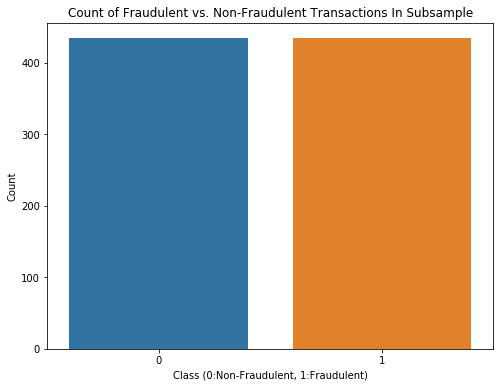

In [33]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [34]:
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.437092
V2,0.476533
V3,-0.572751
V4,0.706753
V5,-0.372547
V6,-0.390448
V7,-0.476508
V8,0.034989
V9,-0.558908
V10,-0.621151


In [35]:
corr[corr.Class < -0.5]

,Class
V3,-0.572751
V9,-0.558908
V10,-0.621151
V12,-0.686544
V14,-0.750650
V16,-0.593170
V17,-0.559005


In [36]:
corr[corr.Class > 0.5]

,Class
V4,0.706753
V11,0.683646
Class,1.000000


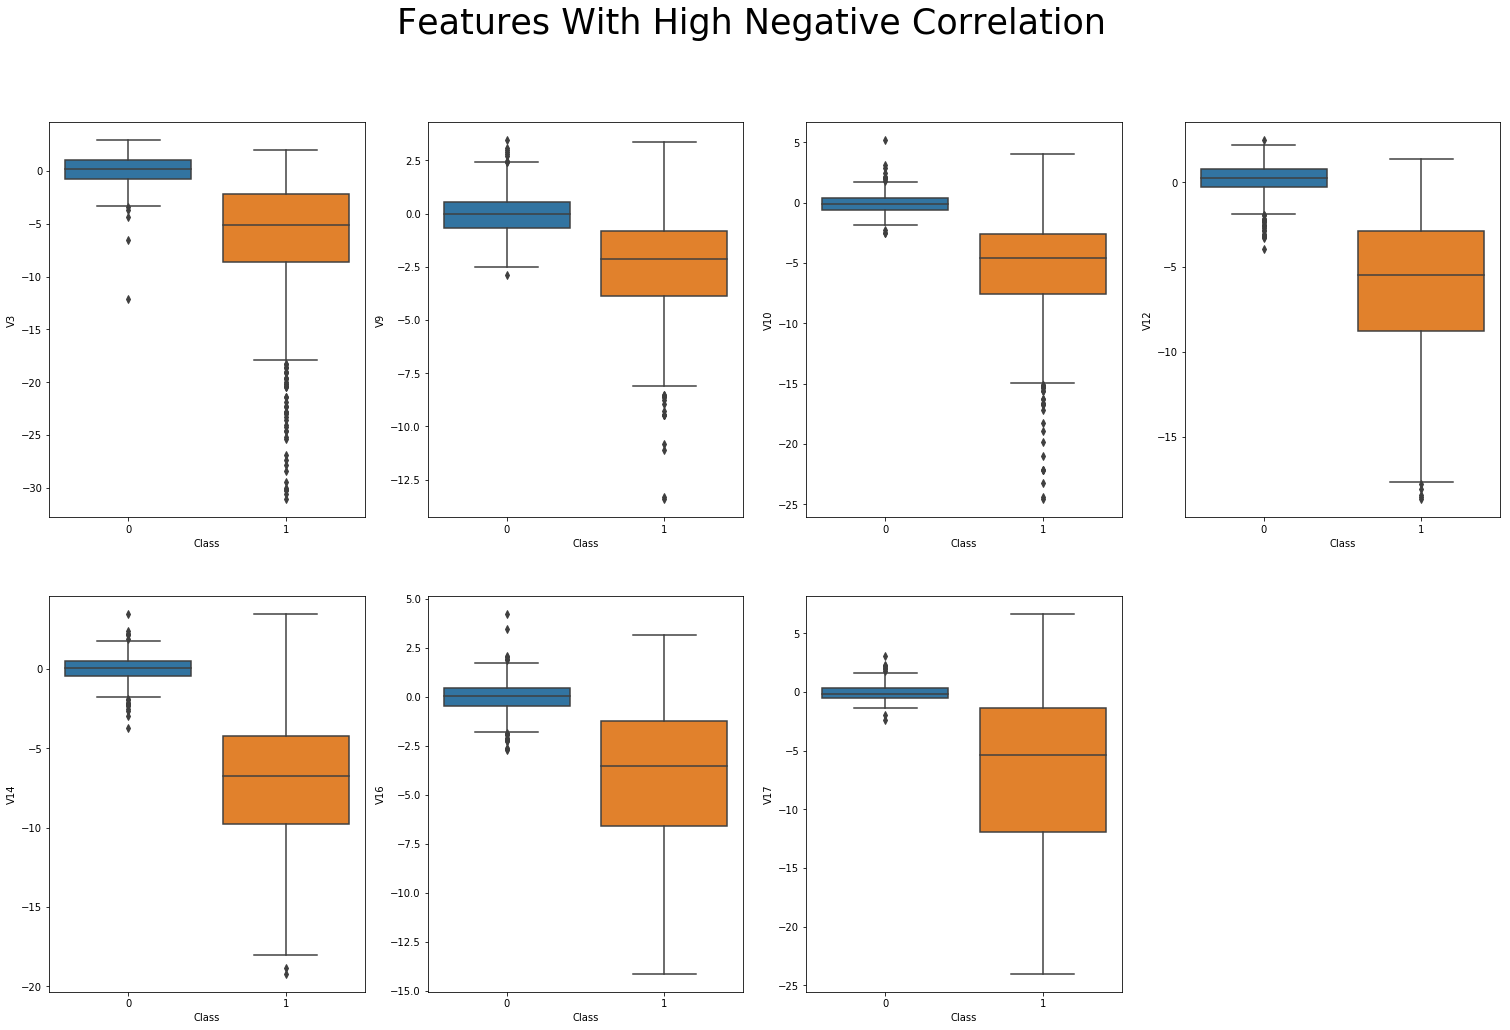

In [37]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

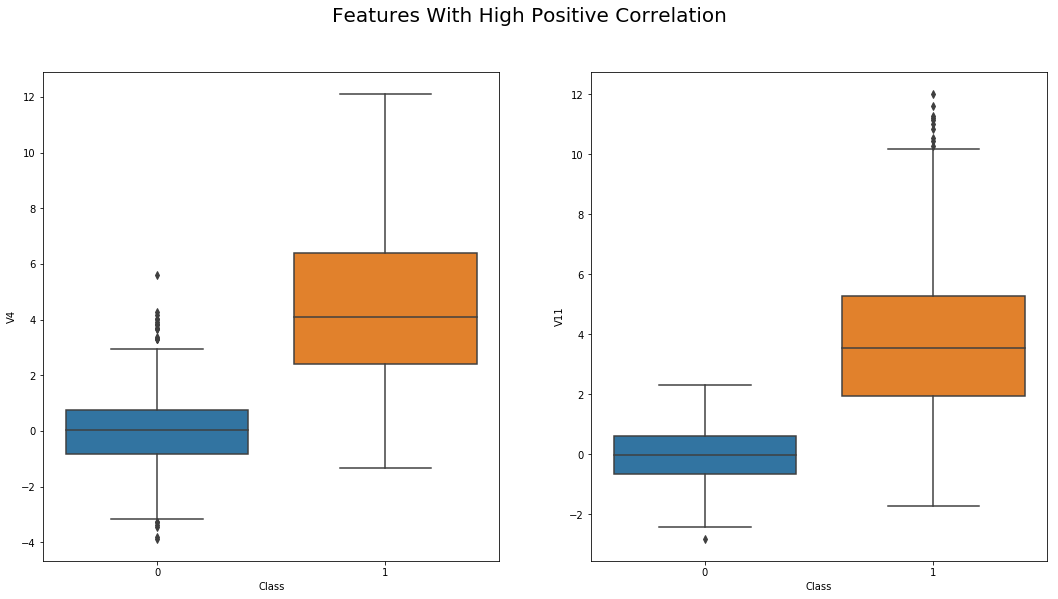

In [38]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [39]:
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [40]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 868 transactions by 246 transactions to 622 transactions.


In [41]:


from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']



In [42]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

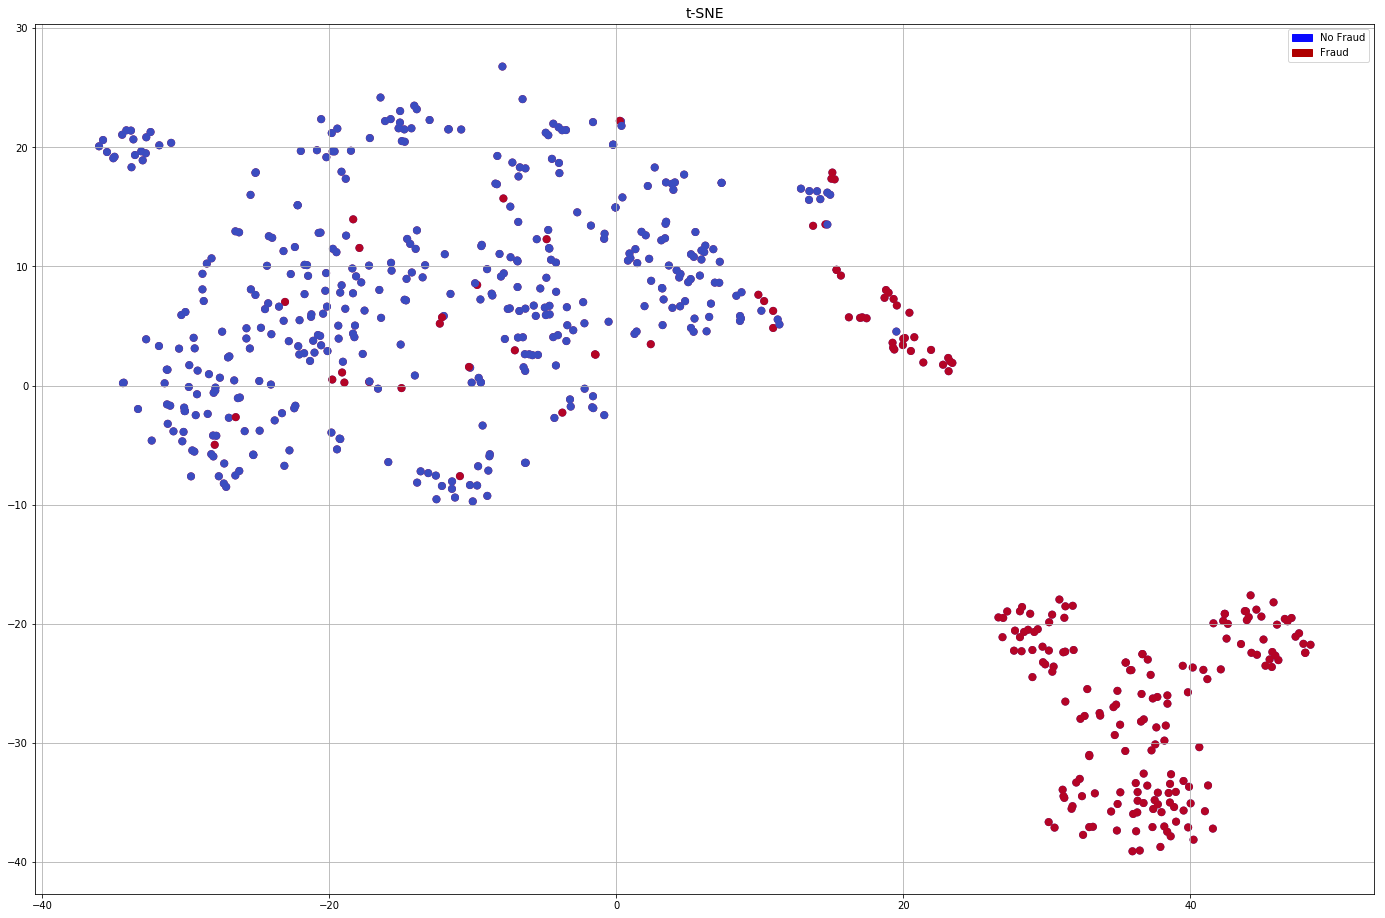

In [43]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [44]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [47]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (497, 30) (125, 30) 

Y_shapes:
 Y_train: Y_validation:
 (497,) (125,)


In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [51]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.975798 (0.027440)
LDA: 0.975042 (0.018684)
KNN: 0.972169 (0.025504)
CART: 0.892529 (0.027775)
SVM: 0.969621 (0.026866)
XGB: 0.974025 (0.019055)
RF: 0.974643 (0.019646)


In [52]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [55]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[80,  2],
       [ 4, 39]])

Text(0.5, 257.44, 'Predicted label')

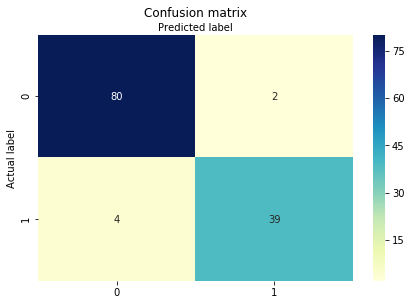

In [56]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.952
Precision: 0.9512195121951219
Recall: 0.9069767441860465


In [58]:
lindis = LinearDiscriminantAnalysis()

# fit the model with data
lindis.fit(X_train,y_train)

#
y_pred=lindis.predict(X_test)

In [59]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[82,  0],
       [ 9, 34]])

Text(0.5, 257.44, 'Predicted label')

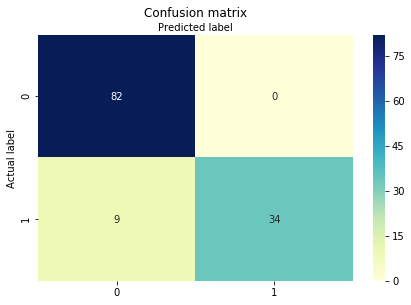

In [60]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.928
Precision: 1.0
Recall: 0.7906976744186046
